#Mine the Gap: Targeting High Risk Patients for Care Coordination & Social Support Services

<img src=http://files.obshandinhand.webnode.nl/200000026-f2e8cf3e1e/200000000.jpg>

*This notebook originally appeared as a [post](http://jakevdp.github.io/blog/2014/11/11/the-hipster-effect-interactive/) on the blog [Pythonic Perambulations](http://jakevdp.github.io). The content is BSD licensed.*

This week I started seeing references all over the internet to [this paper](http://arxiv.org/abs/1410.8001): *The Hipster Effect: When Anticonformists All Look The Same*. It essentially describes a simple mathematical model which models conformity and non-conformity among a mutually interacting population, and finds some interesting results: namely, **conformity among a population of self-conscious non-conformists is similar to a phase transition in a time-delayed thermodynamic system**. In other words, with enough hipsters around responding to delayed fashion trends, a plethora of facial hair and fixed gear bikes is a natural result.

Also naturally, upon reading the paper I wanted to try to reproduce the work. The paper solves the problem analytically for a continuous system and shows the precise values of certain phase transitions within the long-term limit of the postulated system. Though such theoretical derivations are useful, I often find it more intuitive to simulate systems like this in a more approximate manner to gain hands-on understanding. By the end of this notebook, we'll be using IPython's incredible [interactive widgets](http://nbviewer.ipython.org/github/ipython/ipython/blob/master/examples/Interactive%20Widgets/Index.ipynb) to explore how the inputs to this model affect the results.

___

Contents:

* [Think Python](http://www.greenteapress.com/thinkpython/thinkpython.pdf)
* [MIT Open Courseware: A Gentle Introduction to Programming Using Python](http://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-189-a-gentle-introduction-to-programming-using-python-january-iap-2008/index.htm)
* [Learn Python the Hard Way](http://learnpythonthehardway.org/book/)
* [Python Koans](https://github.com/gregmalcolm/python_koans/wiki)

___

## ___Project Overview___

<img src=http://www.cambridgeshireinsight.org.uk/files/caminsight/resize/widerdeterminants-500x337.jpg>

In [1]:
#project overview text

In [2]:
#project overview viz

In [3]:
#project overview viz text

### Problem

> ###From an at-risk patient's perspective, where are the gaps in care?
> ###Ultimately, where are the opportunities for improved system management for most at-risk enrollees?

<a id="goals"></a>
###Goal

Let's ask further questions to better define what we hope to achieve.

> ####Exploratory Analysis

> What factors are associated with poor and good health status?

> Are there any general patterns in comorbidity?

> What is the impact of pain on physical and mental quality of living?

> What is the relationship between mental health and presence of multiple chronic conditions?

> Regional Differences?

> ####Cohort Analysis

> Among Medicare enrollees, which patients are among the most at-risk?

> What are there corresponding demographic and outcomes profiles on total health dimensions? (Heuristic Model)

> How does an individual enrollee's profile compare to Medicaid population? (Radar Chart)

> ####Predictive Modeling

> Can we approximate/predict a new enrollee's risk/gap profile from historical data?

In [4]:
# import warnings
# warnings.filterwarnings('ignore')

import os.path

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(style="darkgrid")

##___Acquire___

The data comes from an HOS Outcomes Survey from 2012. 

In [5]:
#graphic of data dictionary - pre clean

In [6]:
#graphic of data dictionary - post clean

In [7]:
SOURCE_DATA_PATH = 'source_data'
DERIVED_DATA_PATH = 'derived_data'

####Raw data from [hosonline.org](hosonline.org):

In [8]:
!head -n 1 source_data/C16B_PUF.txt

####Intermediary parsing into csv

In [9]:
!head -n 1 source_data/C16B_PUF.csv

#### The Final Dataset(s)

- Profile Dimensions
- Needs Dimensions
- Wellness Dimensions

original data major components
- Profile: (1) Demographics, (2) presence of risk factors (depression, smoking, obesity), (3) Targets - At-Risk, Care Coordination Risk

The dataset consists of XXXX elements comprised of XXXX unique songs from XXXX artists, spanning   XXX weeks.

In [140]:
profile = pd.read_csv(os.path.join(DERIVED_DATA_PATH,'profile.csv'), na_values=' ', index_col='ID')
profile.head(3)

,AGE,RACE,GENDER,MARITALSTAT,EDUCATION,REGION,LANGUAGE,OBESE,SMOKER,DEPRESSION,MCC,AT-RISK,CC-NEED
ID,,,,,,,,,,,,,
C01000060,>74,NaN,F,Married,Less than HS/GED,Region 8 (Denver),English,Not obese (BMI < 30),0,0,5,True,True
C01000361,>74,White,M,Married,HS/GED,Region 9 (San Francisco),English,Not obese (BMI < 30),1,0,2,True,False
C01000455,>74,NaN,NaN,NaN,NaN,Region 10 (Seattle),English,NaN,NaN,NaN,0,False,False


In [11]:
needs = pd.read_csv(os.path.join(DERIVED_DATA_PATH,'needs.csv'), na_values=' ', index_col='ID')
needs.head()

,FELTNP,FELTSD,PNIACT,SCLACT,DIFBTH,DIFDRS,DIFEAT,DIFCHR,DIFWLK,DIFTOL,DIFPRM,DIFMON,DIFMED,BLIND,DEAF,DIFCON,DIFERR
ID,,,,,,,,,,,,,,,,,
C01000060,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0
C01000361,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
C01000455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C01000542,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1
C01000633,1,1,1,1,0,1,0,1,1,0,1,0,1,0,1,1,1


In [48]:
wellness = pd.read_csv(os.path.join(DERIVED_DATA_PATH,'wellness.csv'), na_values=' ', index_col='ID')
wellness.head()

,Bodily Pain,General Health,Vitality,Social Functioning,Physical Functioning,Role Physical,Role Emotional,Mental Health
ID,,,,,,,,
C01000060,3,4,5,1,2.0,4.0,3,2.5
C01000361,2,3,4,0,0.5,1.5,1,1.0
C01000455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C01000542,2,3,6,1,2.0,2.5,1,1.0
C01000633,5,5,6,3,0.0,5.0,5,4.0


##___Explore Data___

###What factors are associated with poor and good health status?

We will do some exploring to see the impact of poor vs. good health status on different health metrics.

In [93]:
import vincent
vincent.initialize_notebook()

##By Demographic/Disease Metrics 

In [ ]:
pd.pivot_table(profile, index='AT-RISK')
profile.pivot_table(index=['RACE', 'AGE'], values='AT-RISK')

##By Needs Metrics 

Let's start by visually inspecting needs for those designated at-risk versus their well counterparts.

In [141]:
needs_pivot_risk = pd.pivot_table(needs.join(profile['AT-RISK']), index='AT-RISK')
needs_pivot_risk.head()

,BLIND,DEAF,DIFBTH,DIFCHR,DIFCON,DIFDRS,DIFEAT,DIFERR,DIFMED,DIFMON,DIFPRM,DIFTOL,DIFWLK,FELTNP,FELTSD,PNIACT,SCLACT
AT-RISK,,,,,,,,,,,,,,,,,
False,0.045945,0.100880,0.050711,0.075673,0.070164,0.039979,0.017338,0.061754,0.061286,0.061200,0.089920,0.028109,0.112952,0.136105,0.118320,0.356625,0.224001
True,0.158441,0.188317,0.276858,0.358100,0.298401,0.232460,0.101420,0.310524,0.158308,0.223666,0.345324,0.169054,0.486458,0.494030,0.418538,0.760322,0.666056


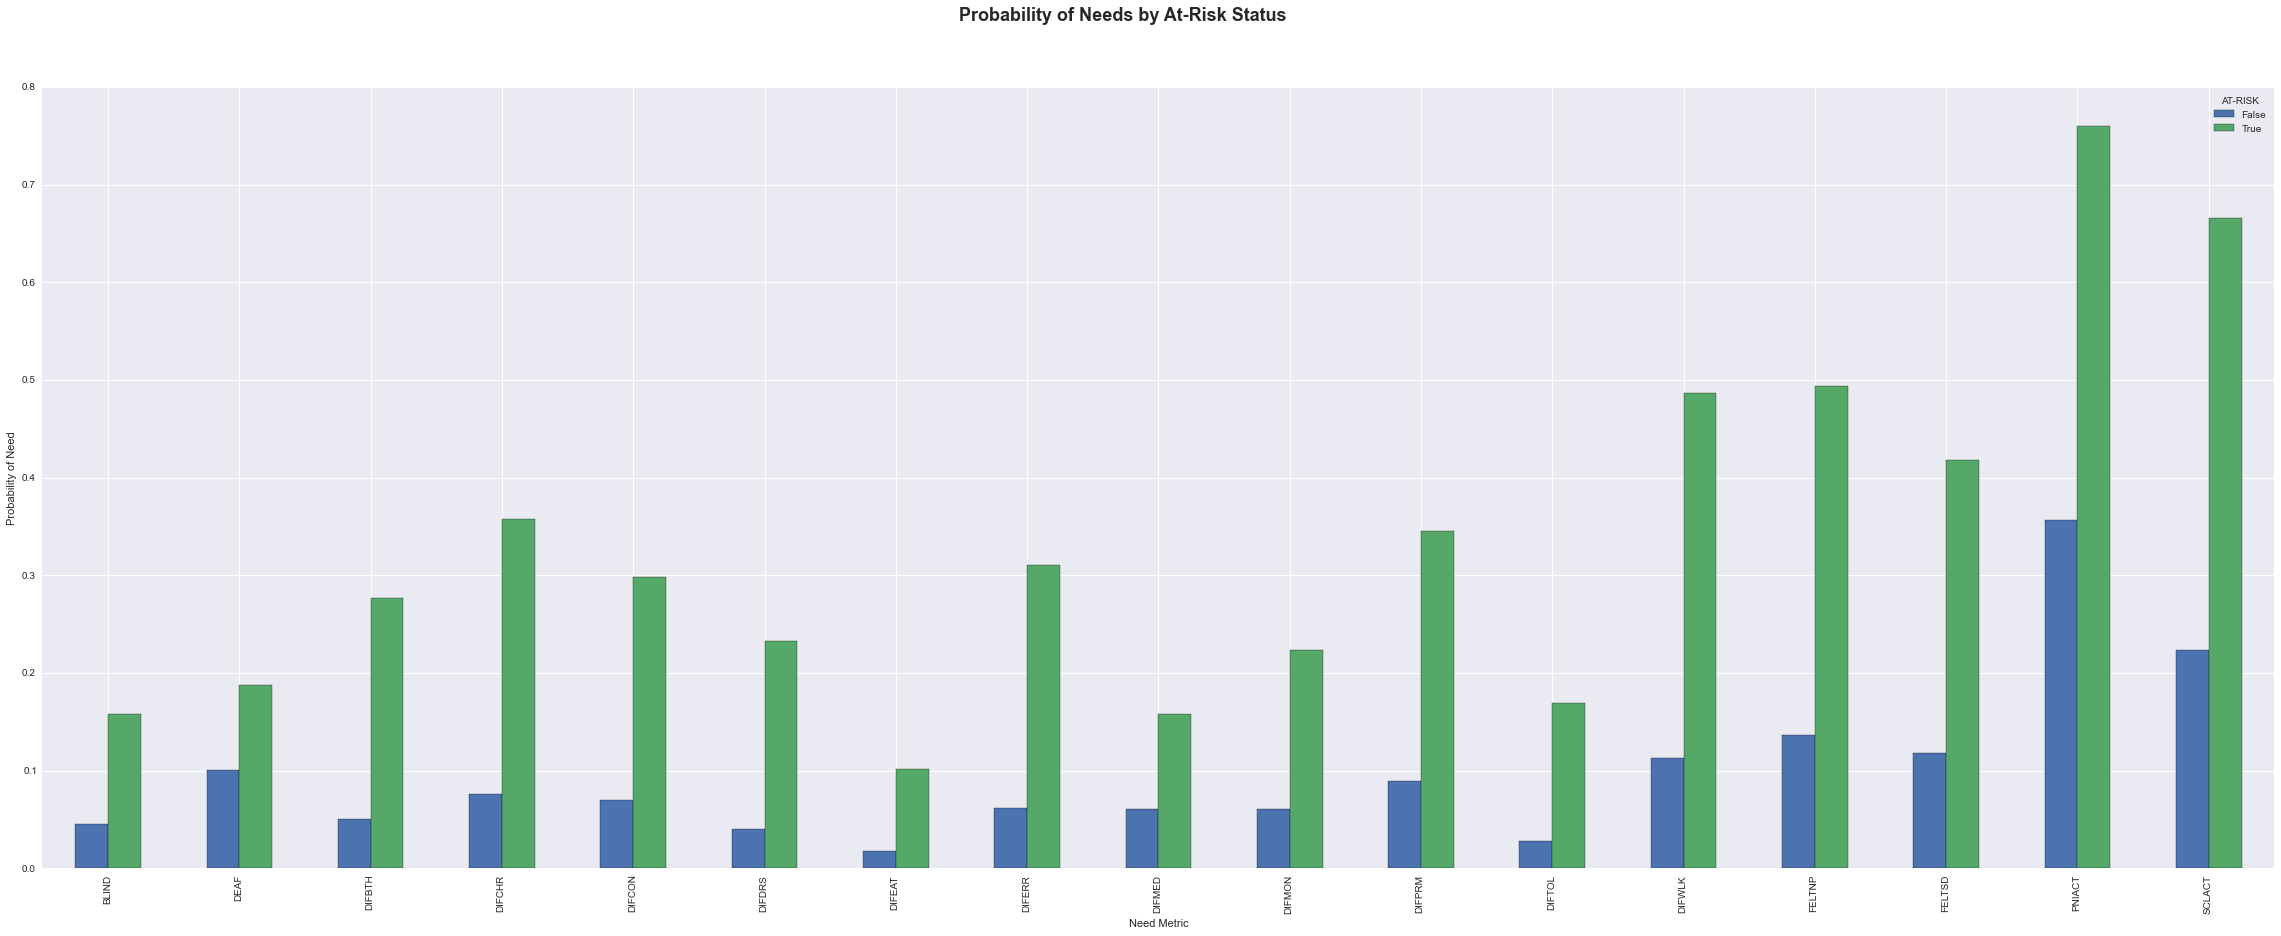

In [173]:
fig = plt.figure()
fig.suptitle('Probability of Needs by At-Risk Status', fontsize=18, fontweight='bold')

ax = fig.add_subplot(111)
ax.set_xlabel('Need Metric')
ax.set_ylabel('Probability of Need')

pd.pivot_table(needs.join(profile['AT-RISK']), index='AT-RISK').transpose().plot(kind='bar', ax=ax, figsize=(40,14))

In [158]:
needs_risk = needs.join(profile['AT-RISK']).dropna()

X = needs_risk.drop('AT-RISK', axis=1)
X_normalized = (X - np.mean(X, axis=0))

y = needs_risk['AT-RISK']

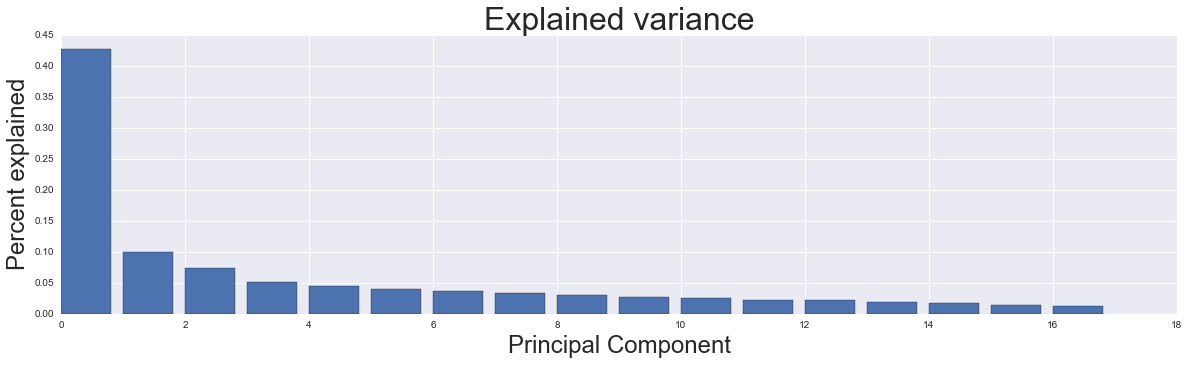

In [159]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=len(needs.columns))

X_pca = pca.fit_transform(X_normalized)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
ax.bar([x for x in range(len(pca.explained_variance_ratio_))], pca.explained_variance_ratio_)

ax.set_title("Explained variance", size=32)
ax.set_ylabel("Percent explained", size=24)
ax.set_xlabel("Principal Component", size=24);

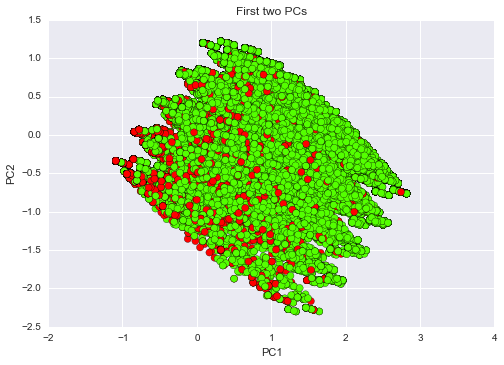

In [161]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, s = 50, cmap=plt.cm.prism)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First two PCs')
plt.show()

Seeing minimal separation witin the first 2 components, thus there is enough overlap to not show a lot of degree of confidence in the indicator causing the spread.   Look to some regression to see if we can determine if there are particular values that may help understand the differences.  It implies to me that we have some potential confounding going on, which would generally make sense given the intertwining nature of these metrics

Predictive R Score: 0.25
 
   features  estimatedCoefficients
0    SCLACT               0.183654
1    PNIACT               0.182320
2    DIFWLK               0.114741
3    FELTNP               0.061191
4     BLIND               0.039090
5    DIFCON               0.037910
6    DIFPRM               0.035223
7    DIFERR               0.026762
8      DEAF               0.025900
9    DIFMON               0.023165
10   DIFCHR               0.014358
11   DIFBTH               0.011220
12   FELTSD              -0.000142
13   DIFEAT              -0.006486
14   DIFDRS              -0.009495
15   DIFTOL              -0.022816
16   DIFMED              -0.047493


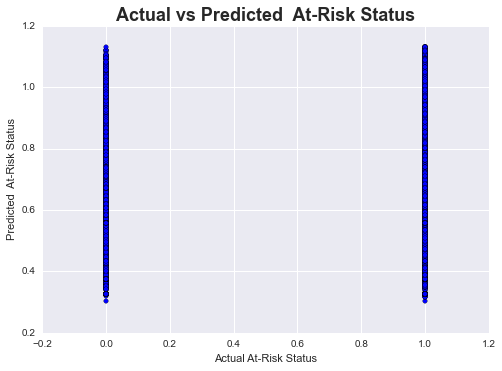

In [171]:
#add p-values USE STATSMODELS https://github.com/ga-students/DAT_SF_12/blob/gh-pages/09-MultiLineaRegression.ipynb

from sklearn import linear_model
from sklearn.feature_selection import SelectKBest, f_regression


clf = linear_model.LinearRegression()

clf.fit(X, y)
clf.coef_


print ("Predictive R Score: %.2f"
      % clf.score(X, y))
print " "

# Print the coefficients


print pd.DataFrame(sorted(zip(X.columns, clf.coef_),key=lambda x: x[1], reverse=True), columns = ['features', 'estimatedCoefficients'])

plt.scatter(y, clf.predict(X))
plt.xlabel("Actual At-Risk Status")
plt.ylabel("Predicted  At-Risk Status")
plt.title("Actual vs Predicted  At-Risk Status", fontsize=18, fontweight='bold')
plt.show()



For example, At-Risk 1.3x more likely to also be CC-Need than Not At-Risk

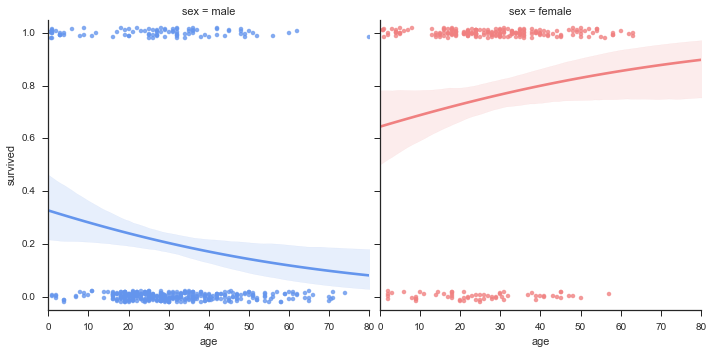

In [90]:
###SWITCH IN MCC, AT-RISK
# Load the example titanic dataset
df = sns.load_dataset("titanic")

# Make a custom palette with gendered colors
pal = dict(male="#6495ED", female="#F08080")

# Show the survival proability as a function of age and sex
g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=df,
               palette=pal, y_jitter=.02, logistic=True)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

In [ ]:
##DEF DO RADAR CHART FOR WELLNESS :)

In [5]:
#explanatory text of data attributes: mean, variance spread

Despite the randomness of the scatterplots, the histograms of the features were almost normally distributed.  I found the distribution of the data to be surprising considering the weekly top 40 is a seemingly random collection of songs with no real relation to one another.

Furthermore, the scatterplots indicated that there would be a lot of noise in the data, given the wide range of song attributes.  The way to analyze the data, I determined, would be to use subsets.  

___

## ___Initial Analysis - Cluster Analysis___

In [6]:
#Text How would we visually segment?  We will compare this later to clustering technique. 

In [ ]:
#Viz

###Building Model

show math:
    
$$
\phi(x;\beta) = \frac{1 + \tanh(\beta \cdot x)}{2}
$$

In [8]:
#Text

To train and score my model, I used a train/test split, which, as the name implies, breaks the dataset up into a training set and a testing set.  The training set is fed into the model to 'teach' the feature variations and their relationship to the target variable and the test set is used to simulate new data that the computer has not seen.  The computer will then score how well the model performs.  In the case of the OLS model, the computer will provide R-Squared values. 

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances

km = KMeans(n_clusters=5, random_state=1)
km.fit(profiles_simple)

In [ ]:
profiles_simple['persona'] = km.predict(profiles_simple)

In [ ]:
profiles_simple.groupby(by='persona').mean()

In [ ]:
profiles_simple[profiles_simple.persona == 4].hist(figsize=(12, 8));

In [ ]:
profiles_simple[profiles_simple.persona == 2].hist(figsize=(12, 8));

In [ ]:
profiles_simple[profiles_simple.persona == 1].hist(figsize=(12, 8));

#### Some things to note about our goals and approach:

* Determine what deﬁnes __success__, and to what degree.
* Brainstorm __metrics__ to visualize and/or calculate.
* Ask __questions__ that have (or can have) a definitive answer.
* Be careful what you wish for, be aware of possible __correlations__, and take caution with how you [measure](http://en.wikipedia.org/wiki/Observer-expectancy_effect) it.

###Scoring Model

In [12]:
# print 'Train Score: ', model.score(xtrain,ytrain)
# print 'Test Score: ', model.score(xtest,ytest)

Both the training and test scores indicate a relatively poor linear fit for the metadata features and elapsed time vs the target value of popularity.  As expected, the model does not show signs of overfitting as the test and train score values are nearly identical.  

###Examing Model & Coefficients

####Feature Analysis

In [ ]:
#four groups boxplots plotted next to each other.
plt.figure(figsize=(20,20))
for i in range(len(features)):
    v = i +1
    ax1 = rock.boxplot(features[i],by='decade',ax=subplot(5,2,v))
    ax1.set_title(str(features[i]),fontsize=15)
    ax1.set_xlabel('')
plt.suptitle('Rock Feature Boxplots by Decade',size=20)

In [ ]:
#compare this clustering to just using quartiles.

According to the boxplots, songs in the top median quantile of popularity demonstrate a slightly higher level of verbosity, energy, and loudness than songs in the lower median quantile.

In [ ]:
#Pros & Cons of other models

Upon examination of the training set, the target values are skewed towards the earlier decades in the dataset.  With the high variation in the data, a Naïve Bayes model, although a strong algorithm, will not pick up on the nuances in the song metadata to make effective predictions to the song’s decade of origin.  This is because Naive Bayes assumes that all features are independent of one another.

In place of Naïve Bayes, I will use a Random Forest model.  Although very prone to overfitting on the training set in machine learning models, this model is strong enough to pick up on the subtle variations in the data, as it does not perceive all of the features to be in a vacuum like the Bayes algorithm.  Moreover, as the rock song dataset only consists of 5,056 unique songs, scaling with hundreds decision trees should not prove to be an issue.


In [ ]:
#for factor analysis: https://www.hawaii.edu/powerkills/UFA.HTM
#radar chart for dashboard -----   http://bl.ocks.org/chrisrzhou/2421ac6541b68c1680f8

___

##Conclusions

Through the use of song metadata for the Billboard Top 40 for the past half century and OLS, Logistic, Random Forest, and K-Means machine learning algorithms, I determined that time plays a larger role in the popularity attrition of a song than any metadata factor in an OLS linear model.  Using a categorial logistic regression model, however, I found that loudness, energy, and danceability, to some extent, account for some of the gains in song popularity. 

Moreover, depending on the strength of the algorithm used, song metadata can be a decent predictor to determine from which decade a particular song comes.  The metadata truly shines, however, in the classification and clustering of genres.  In developing my own genre clusters with K-Means, I was amazed how accurately the computer picked like-sounding songs through only 5 feature attributes.  

As the genre area plot demonstrated, we as a culture are getting more diverse in terms of the music to which we listen.  With the power of machine learning, however, services like Spotify, Google Music, and Pandora will never be at a loss for songs to meet a particular individual’s tastes, despite the ever increasing scope of possibilities.


___

##Further Research

___

### More Information

For more information please visit:

For more code and the datasets for this project, please visit my GitHub page:

In [ ]:
# Modified Stylesheet for notebook.
# from IPython.core.display import HTML
# def css_styling():
#     styles = open("../custom_nb_style.css", "r").read()
#     return HTML(styles)

# css_styling()

# from IPython.core.display import HTML
# styles = open("custom_dark.css", "r").read()
# HTML(styles)

##### For prettier graphs see http://localhost:8888/notebooks/project/iPython%20notebook%20gallery/Up%20and%20Down%20PyData%202014.ipynb